In [62]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import os

from pydataset import data

###Data Acquisition

#1
In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

print the first 3 rows
print the number of rows and columns (shape)
print the column names
print the data type of each column
print the summary statistics for each of the numeric variables. Would you recommend rescaling the data based on these statistics?

In [3]:
#1
df_iris = data('iris')
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [4]:
#1
df_iris.shape

(150, 5)

In [5]:
#1
df_iris.columns

# or create a list
# df_iris.tolist()

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [6]:
#1
df_iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

In [7]:
#1
stats = df_iris.describe().T
# .T transcribes the df so that we can call the columns that we want
stats

,count,mean,std,min,25%,50%,75%,max
Sepal.Length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal.Width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
Petal.Length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
Petal.Width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [8]:
#1
stats['range'] = stats['max'] - stats['min']
stats
# I don't think rescaling is necessary because the different rows and columns
# are in a similar range

,count,mean,std,min,25%,50%,75%,max,range
Sepal.Length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9,3.6
Sepal.Width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4,2.4
Petal.Length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9,5.9
Petal.Width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5,2.4


#2
Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.

assign the first 100 rows to a new dataframe, df_excel_sample
print the number of rows of your original dataframe
print the first 5 column names
print the column names that have a data type of object
compute the range for each of the numeric variables.

In [9]:
#2
df_telco = pd.read_excel('Spreadsheets_Exercises.xlsx')
df_telco.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,Unnamed: 12,Unnamed: 13
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No,NaN,NaN
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No,NaN,NaN
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes,NaN,NaN
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes,NaN,NaN
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes,NaN,NaN


In [10]:
#2
# convert these columns to boolean
df_telco.partner = df_telco.partner == 'Yes'
df_telco.dependents = df_telco.dependents == 'Yes'
df_telco.churn = df_telco.churn == 'Yes'
df_telco.is_senior_citizen = df_telco.is_senior_citizen == 1

df_telco.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,Unnamed: 12,Unnamed: 13
0,0002-ORFBO,Female,False,True,True,1,1,1,Mailed check,65.6,593.30,False,NaN,NaN
1,0003-MKNFE,Male,False,False,False,2,1,0,Mailed check,59.9,542.40,False,NaN,NaN
2,0004-TLHLJ,Male,False,False,False,1,2,0,Electronic check,73.9,280.85,True,NaN,NaN
3,0011-IGKFF,Male,True,True,False,1,2,0,Electronic check,98.0,1237.85,True,NaN,NaN
4,0013-EXCHZ,Female,True,True,False,1,2,0,Mailed check,83.9,267.40,True,NaN,NaN


In [11]:
#2
df_telco_sample = df_telco.head(100)

In [12]:
#2
df_telco.shape[0]

7049

In [13]:
#2
df_telco.columns[0:5].to_list()

['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents']

In [14]:
#2
df_telco.select_dtypes(include='object').columns.to_list()

['customer_id', 'gender', 'payment_type']

In [15]:
#2
stats = df_telco.describe().T
stats

,count,mean,std,min,25%,50%,75%,max
phone_service,7049.0,1.324585,0.642709,0.00,1.0000,1.00,2.000,2.00
internet_service,7049.0,1.222585,0.779068,0.00,1.0000,1.00,2.000,2.00
contract_type,7049.0,0.690878,0.833757,0.00,0.0000,0.00,1.000,2.00
monthly_charges,7049.0,64.747014,30.099460,18.25,35.4500,70.35,89.850,118.75
total_charges,7038.0,2283.043883,2266.521984,18.80,401.5875,1397.10,3793.775,8684.80
Unnamed: 12,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 13,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#2
stats['range'] = stats['max'] - stats['min']
stats

,count,mean,std,min,25%,50%,75%,max,range
phone_service,7049.0,1.324585,0.642709,0.00,1.0000,1.00,2.000,2.00,2.0
internet_service,7049.0,1.222585,0.779068,0.00,1.0000,1.00,2.000,2.00,2.0
contract_type,7049.0,0.690878,0.833757,0.00,0.0000,0.00,1.000,2.00,2.0
monthly_charges,7049.0,64.747014,30.099460,18.25,35.4500,70.35,89.850,118.75,100.5
total_charges,7038.0,2283.043883,2266.521984,18.80,401.5875,1397.10,3793.775,8684.80,8666.0
Unnamed: 12,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 13,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#2
# alternative method to get the range
num = df_telco.select_dtypes(include = ['float64', 'int64'])
num.max() - num.min()

phone_service          2.0
internet_service       2.0
contract_type          2.0
monthly_charges      100.5
total_charges       8666.0
Unnamed: 12            NaN
Unnamed: 13            NaN
dtype: float64

#3
Read the data from this google sheet into a dataframe, df_google

print the first 3 rows
print the number of rows and columns
print the column names
print the data type of each column
print the summary statistics for each of the numeric variables
print the unique values for each of your categorical variables

In [18]:
#3
# assign a variable name to the url
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'

In [19]:
#3
# modify the google sheet share url to become a csv export url
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

# convert csv to dataframe
df_google = pd.read_csv(csv_export_url)

df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [20]:
#3
df_google.shape

(891, 12)

In [21]:
#3
df_google.columns.to_list()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [22]:
#3
df_google.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [23]:
#3
df_google.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [24]:
#3
for column in df_google.select_dtypes(include='object').columns:
    print(f'values in {column} column:')
    print(df_google[column].value_counts())
    print('..........')
    
   

values in Name column:
Harknett, Miss. Alice Phoebe                                1
Carter, Mrs. Ernest Courtenay (Lilian Hughes)               1
Walker, Mr. William Anderson                                1
Blank, Mr. Henry                                            1
Turpin, Mrs. William John Robert (Dorothy Ann Wonnacott)    1
                                                           ..
Nicholls, Mr. Joseph Charles                                1
Vander Cruyssen, Mr. Victor                                 1
Strom, Miss. Telma Matilda                                  1
Klasen, Mr. Klas Albin                                      1
del Carlo, Mr. Sebastiano                                   1
Name: Name, Length: 891, dtype: int64
..........
values in Sex column:
male      577
female    314
Name: Sex, dtype: int64
..........
values in Ticket column:
347082              7
CA. 2343            7
1601                7
3101295             6
CA 2144             6
                   ..
2842

In [25]:
#import acquire
from acquire import get_titanic_data
get_titanic_data()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [26]:
from acquire import get_iris_data
get_iris_data()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa
5,1,6,5.4,3.9,1.7,0.4,setosa
6,1,7,4.6,3.4,1.4,0.3,setosa
7,1,8,5.0,3.4,1.5,0.2,setosa
8,1,9,4.4,2.9,1.4,0.2,setosa
9,1,10,4.9,3.1,1.5,0.1,setosa


###Data Preparation

In [27]:
#1
iris_df = get_iris_data()
iris_df.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


In [28]:
#2
iris_df = iris_df.drop(columns = ['species_id', 'measurement_id'])
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [29]:
#3
iris_df = iris_df.rename(columns= {'species_name':'species'})
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [30]:
#4
iris_df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [31]:
#4
dummy_df= pd.get_dummies(iris_df['species'], dummy_na = False, drop_first=False)
dummy_df

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,1,0,0


In [32]:
#4
iris_df= pd.concat([iris_df, dummy_df], axis=1)
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,4.7,3.2,1.3,0.2,setosa,1,0,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0
4,5.0,3.6,1.4,0.2,setosa,1,0,0


In [33]:
#5
def prep_iris(df):
    iris_df = df.drop(columns = ['species_id', 'measurement_id'])
    iris_df = iris_df.rename(columns= {'species_name':'species'})
    dummy_df= pd.get_dummies(iris_df['species'], dummy_na = False, drop_first=False)
    iris_df= pd.concat([iris_df, dummy_df], axis=1)
    train, test = train_test_split(iris_df, test_size=0.2, random_state=1349, stratify=iris_df.species)
    train, validate = train_test_split(train, train_size=0.7, random_state=1349, stratify=train.species)
    return train, validate, test

In [34]:
iris_df = get_iris_data()
train, validate, test = prep_iris(iris_df)

In [35]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
138,6.0,3.0,4.8,1.8,virginica,0,0,1
7,5.0,3.4,1.5,0.2,setosa,1,0,0
79,5.7,2.6,3.5,1.0,versicolor,0,1,0
74,6.4,2.9,4.3,1.3,versicolor,0,1,0
97,6.2,2.9,4.3,1.3,versicolor,0,1,0


In [36]:
validate.head()

,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
5,5.4,3.9,1.7,0.4,setosa,1,0,0
28,5.2,3.4,1.4,0.2,setosa,1,0,0
33,5.5,4.2,1.4,0.2,setosa,1,0,0
46,5.1,3.8,1.6,0.2,setosa,1,0,0
113,5.7,2.5,5.0,2.0,virginica,0,0,1


In [37]:
test.head()

,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
24,4.8,3.4,1.9,0.2,setosa,1,0,0
117,7.7,3.8,6.7,2.2,virginica,0,0,1
17,5.1,3.5,1.4,0.3,setosa,1,0,0
31,5.4,3.4,1.5,0.4,setosa,1,0,0
114,5.8,2.8,5.1,2.4,virginica,0,0,1


###Exploratory Analysis

Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

Acquire, prepare & split your data.

Univariate Stats

For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

Document takeaways & any actions.

In [38]:
# Acquire, prepare & split your data.
iris_df = get_iris_data()
train, validate, test = prep_iris(iris_df)

In [39]:
train.shape, validate.shape, test.shape

((84, 8), (36, 8), (30, 8))

In [40]:
# For each measurement type (quantitative variable): create a histogram, 
# boxplot, & compute descriptive statistics (using .describe()).

train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
138,6.0,3.0,4.8,1.8,virginica,0,0,1
7,5.0,3.4,1.5,0.2,setosa,1,0,0
79,5.7,2.6,3.5,1.0,versicolor,0,1,0
74,6.4,2.9,4.3,1.3,versicolor,0,1,0
97,6.2,2.9,4.3,1.3,versicolor,0,1,0


In [41]:
train.sepal_length.describe()

count    84.000000
mean      5.847619
std       0.841324
min       4.300000
25%       5.075000
50%       5.900000
75%       6.425000
max       7.700000
Name: sepal_length, dtype: float64

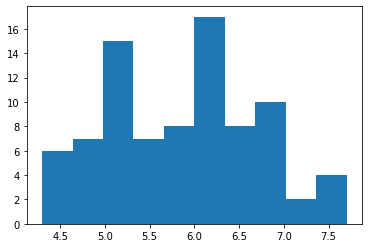

In [42]:
train.sepal_length.hist().grid(False)

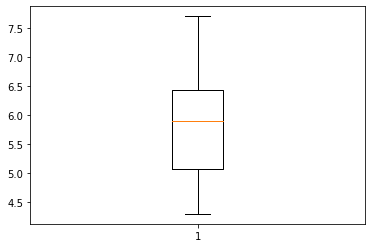

In [43]:
plt.boxplot(train.sepal_length)
plt.show()

In [44]:
train.sepal_width.describe()

count    84.000000
mean      3.053571
std       0.417233
min       2.000000
25%       2.800000
50%       3.000000
75%       3.300000
max       4.400000
Name: sepal_width, dtype: float64

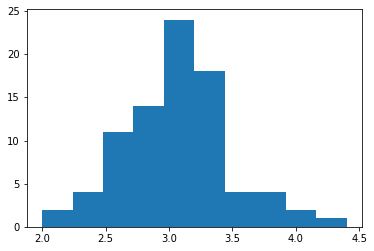

In [45]:
train.sepal_width.hist().grid(False)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f90137b66a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f90137b6d60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f90137b6370>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9013799460>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f90137997c0>],
 'means': []}

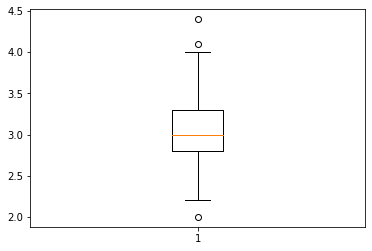

In [46]:
plt.boxplot(train.sepal_width)

In [47]:
train.petal_length.describe()

count    84.000000
mean      3.738095
std       1.765459
min       1.000000
25%       1.600000
50%       4.300000
75%       5.100000
max       6.900000
Name: petal_length, dtype: float64

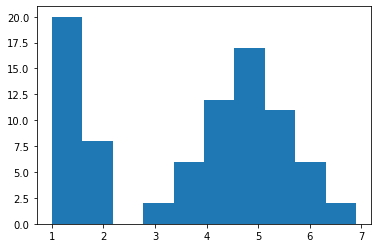

In [48]:
train.petal_length.hist().grid(False)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f901384c100>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9013b30b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f901384c8e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9013b30730>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9013b30fd0>],
 'means': []}

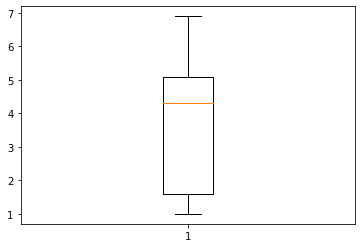

In [49]:
plt.boxplot(train.petal_length)

In [50]:
train.petal_width.describe()

count    84.000000
mean      1.208333
std       0.775717
min       0.100000
25%       0.375000
50%       1.300000
75%       1.800000
max       2.500000
Name: petal_width, dtype: float64

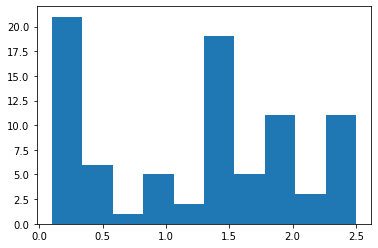

In [51]:
train.petal_width.hist().grid(False)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9013bcf7f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9013bcf2b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9013bcf940>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9013c456a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9013c45820>],
 'means': []}

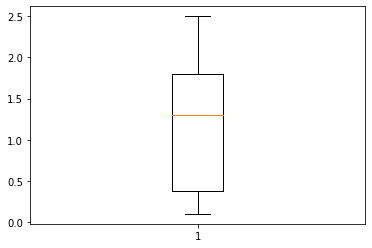

In [52]:
plt.boxplot(train.petal_width)

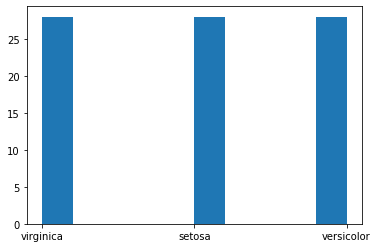

In [53]:
# For each species (categorical variable): create a frequency table and a bar plot 
# of those frequencies.
train.species.hist().grid(False)

In [54]:
train.species.value_counts()

virginica     28
versicolor    28
setosa        28
Name: species, dtype: int64

Takeaways
The univariate sepal width may have a normal distribution, but the other parameters appear to have several different distributions smushed together

Bivariate Stats

Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

For each measurement type, compute the descriptive statistics for each species.

For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

Document takeaways & any actions.

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

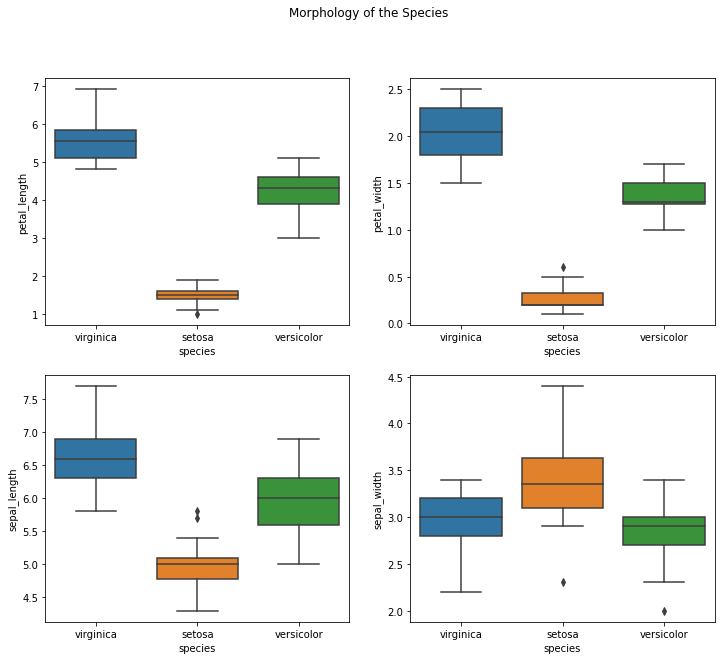

In [55]:
plt.figure(figsize=(12, 10))
plt.suptitle('Morphology of the Species')
plt.subplot(221)
sns.boxplot(data=train, y='petal_length', x='species')
plt.subplot(222)
sns.boxplot(data=train, y='petal_width', x='species')
plt.subplot(223)
sns.boxplot(data=train, y='sepal_length', x='species')
plt.subplot(224)
sns.boxplot(data=train, y='sepal_width', x='species')

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


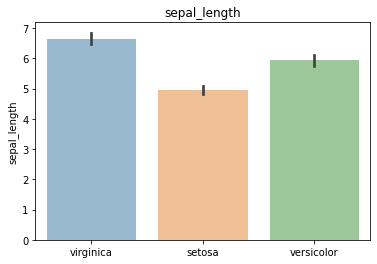

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


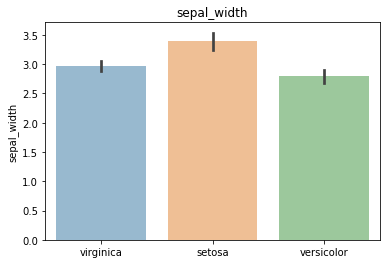

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


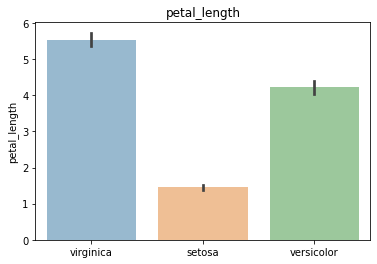

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


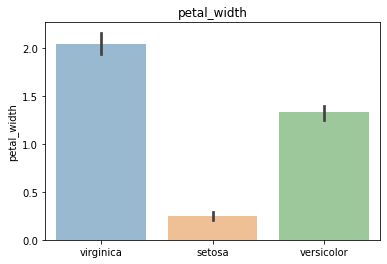

In [56]:
# alternative method of plotting using a loop
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for i in range(0,4):
    sns.barplot('species', features[i], data=train, alpha=0.5)
    plt.xlabel('')
    plt.ylabel(features[i])
    plt.title(features[i])
    plt.show()

In [57]:
train[train.species == 'virginica'].describe().drop(columns=['setosa', 'versicolor'])

,sepal_length,sepal_width,petal_length,petal_width,virginica
count,28.000000,28.000000,28.000000,28.000000,28.0
mean,6.650000,2.975000,5.539286,2.046429,1.0
std,0.532986,0.260519,0.525173,0.294998,0.0
min,5.800000,2.200000,4.800000,1.500000,1.0
25%,6.300000,2.800000,5.100000,1.800000,1.0
50%,6.600000,3.000000,5.550000,2.050000,1.0
75%,6.900000,3.200000,5.825000,2.300000,1.0
max,7.700000,3.400000,6.900000,2.500000,1.0


In [58]:
train[train.species == 'setosa'].describe().drop(columns=['virginica', 'versicolor'])

,sepal_length,sepal_width,petal_length,petal_width,setosa
count,28.000000,28.000000,28.000000,28.000000,28.0
mean,4.957143,3.385714,1.457143,0.246429,1.0
std,0.362531,0.433516,0.185450,0.129048,0.0
min,4.300000,2.300000,1.000000,0.100000,1.0
25%,4.775000,3.100000,1.400000,0.200000,1.0
50%,5.000000,3.350000,1.500000,0.200000,1.0
75%,5.100000,3.625000,1.600000,0.325000,1.0
max,5.800000,4.400000,1.900000,0.600000,1.0


In [59]:
train[train.species == 'versicolor'].describe().drop(columns=['setosa', 'virginica'])

,sepal_length,sepal_width,petal_length,petal_width,versicolor
count,28.000000,28.000000,28.000000,28.000000,28.0
mean,5.935714,2.800000,4.217857,1.332143,1.0
std,0.512231,0.303071,0.522142,0.205577,0.0
min,5.000000,2.000000,3.000000,1.000000,1.0
25%,5.600000,2.700000,3.900000,1.275000,1.0
50%,6.000000,2.900000,4.300000,1.300000,1.0
75%,6.300000,3.000000,4.600000,1.500000,1.0
max,6.900000,3.400000,5.100000,1.700000,1.0


In [63]:
# For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (
# scipy.stats.mannwhitneyu) to see if there is a significant difference between the 
# two groups. Do the same for the other measurement types.

# HO: mean petal width virginica == mean petal width versicolor
# Ha: mean petal width virginica != mean petal width versicolor

vir_pw = train.petal_width[train.species == 'virginica']
ver_pw = train.petal_width[train.species == 'versicolor']
s, p = stats.mannwhitneyu(vir_pw, ver_pw)
s, p

(15.5, 2.982389808696449e-10)

In [64]:
vir_pl = train.petal_length[train.species == 'virginica']
ver_pl = train.petal_length[train.species == 'versicolor']
s, p = stats.mannwhitneyu(vir_pl, ver_pl)
s, p

(12.5, 2.5253450566492905e-10)

In [65]:
vir_sw = train.sepal_width[train.species == 'virginica']
ver_sw = train.sepal_width[train.species == 'versicolor']
s, p = stats.mannwhitneyu(vir_sw, ver_sw)
s, p

(250.0, 0.009508012794926874)

In [66]:
vir_sl = train.sepal_length[train.species == 'virginica']
ver_sl = train.sepal_length[train.species == 'versicolor']
s, p = stats.mannwhitneyu(vir_sl, ver_sl)
s, p

(132.0, 1.0119920315840642e-05)

Takeaways:
Setosa has the smallest petal width/length and sepal length, but may have the highest sepal width

Virginica has the largest petal width/length and sepal length and has the highest sepal length

Exercise 2
Create a swarmplot using a melted dataframe of all your numeric variables. 

In [67]:
melted = train.melt(id_vars='species')
melted

,species,variable,value
0,virginica,sepal_length,6.0
1,setosa,sepal_length,5.0
2,versicolor,sepal_length,5.7
3,versicolor,sepal_length,6.4
4,versicolor,sepal_length,6.2
...,...,...,...
583,virginica,virginica,1.0
584,versicolor,virginica,0.0
585,versicolor,virginica,0.0
586,virginica,virginica,1.0


In [68]:
melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   species   588 non-null    object 
 1   variable  588 non-null    object 
 2   value     588 non-null    float64
dtypes: float64(1), object(2)
memory usage: 13.9+ KB


In [69]:
train.shape

(84, 8)

In [ ]:
# For each species (categorical variable): create a frequency table and a bar plot 
# of those frequencies.
virginica_sp = train[train.species == 'virginica']
setosa_sp = train[train.species == 'setosa']
versicolor_sp = train[train.species == 'versicolor']

train.species.value_counts()